In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

import nba_api


In [2]:
### Finding and storing Player ID
# Use ternary operator or write function 
# Names are case sensitive
from nba_api.stats.static import players
player_dict = players.get_players()
playerinfo = [player for player in player_dict if player['full_name'] == 'Kristaps Porzingis'][0]

playerid = playerinfo['id']


### Getting Game Data (Kristaps Porzingis)

In [3]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog
# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

playerallgames = playergamelog.PlayerGameLog(player_id=playerid, season = SeasonAll.all)
## Convert lists to df
df_playerallgames = playerallgames.get_data_frames()[0]

display(df_playerallgames.columns)

## Adding Opponent Column
df_playerallgames['Opponent'] = df_playerallgames['MATCHUP'].str[-3:]

## Adding Home / Away Column
df_playerallgames["Home/Away"] = df_playerallgames["MATCHUP"].map(lambda x: "Home" if "vs." in x else "Away" if "@" in x else "")

display(df_playerallgames)

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Home/Away
0,22020,204001,0022000866,"APR 18, 2021",DAL vs. SAC,L,37,3,14,0.214,...,3,0,0,0,1,9,-24,1,SAC,Home
1,22020,204001,0022000854,"APR 16, 2021",DAL vs. NYK,L,38,8,20,0.400,...,1,1,2,3,1,23,-4,1,NYK,Home
2,22020,204001,0022000837,"APR 14, 2021",DAL @ MEM,W,32,7,13,0.538,...,1,0,0,1,4,21,4,1,MEM,Away
3,22020,204001,0022000810,"APR 11, 2021",DAL vs. SAS,L,36,12,21,0.571,...,3,0,2,3,6,31,-4,1,SAS,Home
4,22020,204001,0022000786,"APR 08, 2021",DAL vs. MIL,W,33,10,20,0.500,...,1,0,2,1,2,26,17,1,MIL,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,22015,204001,0021500063,"NOV 04, 2015",NYK @ CLE,L,21,6,11,0.545,...,1,2,2,0,5,13,-1,1,CLE,Away
276,22015,204001,0021500048,"NOV 02, 2015",NYK vs. SAS,L,24,5,15,0.333,...,1,3,2,2,5,13,-8,1,SAS,Home
277,22015,204001,0021500034,"OCT 31, 2015",NYK @ WAS,W,21,3,6,0.500,...,0,0,0,1,4,8,10,1,WAS,Away
278,22015,204001,0021500019,"OCT 29, 2015",NYK vs. ATL,L,26,4,10,0.400,...,0,3,1,4,5,10,-5,1,ATL,Home


### Checking Data 

In [4]:
df_playerallgames.dtypes

SEASON_ID           object
Player_ID            int64
Game_ID             object
GAME_DATE           object
MATCHUP             object
WL                  object
MIN                  int64
FGM                  int64
FGA                  int64
FG_PCT             float64
FG3M                 int64
FG3A                 int64
FG3_PCT            float64
FTM                  int64
FTA                  int64
FT_PCT             float64
OREB                 int64
DREB                 int64
REB                  int64
AST                  int64
STL                  int64
BLK                  int64
TOV                  int64
PF                   int64
PTS                  int64
PLUS_MINUS           int64
VIDEO_AVAILABLE      int64
Opponent            object
Home/Away           object
dtype: object

In [5]:
df_playerallgames.isnull().values.any()

False

In [6]:
df_playerallgames.describe()

,Player_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,280.0,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,204001.0,31.214286,6.750000,15.346429,0.433371,1.817857,5.078571,0.327421,3.375000,4.178571,...,6.164286,7.875000,1.460714,0.685714,1.964286,1.696429,3.114286,18.692857,0.778571,1.021429
std,0.0,6.147279,2.994918,4.697821,0.135017,1.461220,2.526045,0.230531,2.587276,3.077885,...,2.835036,3.376402,1.223380,0.868284,1.560768,1.274504,1.552363,7.909793,12.233726,0.145067
min,204001.0,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,1.000000
25%,204001.0,28.000000,4.750000,12.000000,0.353000,1.000000,3.000000,0.167000,2.000000,2.000000,...,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000,2.000000,13.000000,-7.000000,1.000000
50%,204001.0,32.000000,7.000000,15.000000,0.436500,2.000000,5.000000,0.333000,3.000000,4.000000,...,6.000000,8.000000,1.000000,0.000000,2.000000,2.000000,3.000000,18.000000,-0.500000,1.000000
75%,204001.0,36.000000,9.000000,18.250000,0.505000,3.000000,7.000000,0.500000,5.000000,6.000000,...,8.000000,10.000000,2.000000,1.000000,3.000000,2.000000,4.000000,24.000000,9.000000,1.000000
max,204001.0,45.000000,15.000000,28.000000,1.000000,8.000000,14.000000,1.000000,12.000000,14.000000,...,15.000000,18.000000,5.000000,5.000000,7.000000,5.000000,6.000000,40.000000,38.000000,2.000000


### Exploratory Data Analysis

In [7]:
eda = df_playerallgames

In [8]:
eda.GAME_DATE = pd.to_datetime(eda.GAME_DATE, errors='coerce')

In [9]:
display(eda)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Home/Away
0,22020,204001,0022000866,2021-04-18,DAL vs. SAC,L,37,3,14,0.214,...,3,0,0,0,1,9,-24,1,SAC,Home
1,22020,204001,0022000854,2021-04-16,DAL vs. NYK,L,38,8,20,0.400,...,1,1,2,3,1,23,-4,1,NYK,Home
2,22020,204001,0022000837,2021-04-14,DAL @ MEM,W,32,7,13,0.538,...,1,0,0,1,4,21,4,1,MEM,Away
3,22020,204001,0022000810,2021-04-11,DAL vs. SAS,L,36,12,21,0.571,...,3,0,2,3,6,31,-4,1,SAS,Home
4,22020,204001,0022000786,2021-04-08,DAL vs. MIL,W,33,10,20,0.500,...,1,0,2,1,2,26,17,1,MIL,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,22015,204001,0021500063,2015-11-04,NYK @ CLE,L,21,6,11,0.545,...,1,2,2,0,5,13,-1,1,CLE,Away
276,22015,204001,0021500048,2015-11-02,NYK vs. SAS,L,24,5,15,0.333,...,1,3,2,2,5,13,-8,1,SAS,Home
277,22015,204001,0021500034,2015-10-31,NYK @ WAS,W,21,3,6,0.500,...,0,0,0,1,4,8,10,1,WAS,Away
278,22015,204001,0021500019,2015-10-29,NYK vs. ATL,L,26,4,10,0.400,...,0,3,1,4,5,10,-5,1,ATL,Home


In [1]:
### Correlation between all features

plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(eda.corr(), annot=True,cmap ='Blues')

NameError: name 'plt' is not defined

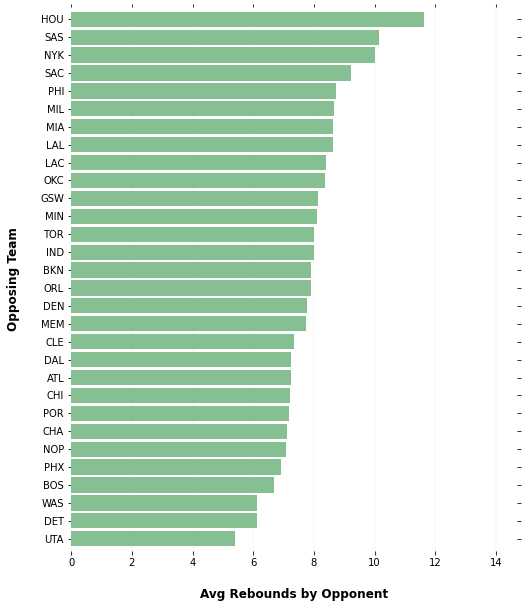

In [11]:
### Avg. rebounds by opponent

avgreboundsbyopponent = eda.groupby(['Opponent'])['REB'].mean().sort_values()



ax = avgreboundsbyopponent.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Avg Rebounds by Opponent", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Opposing Team", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


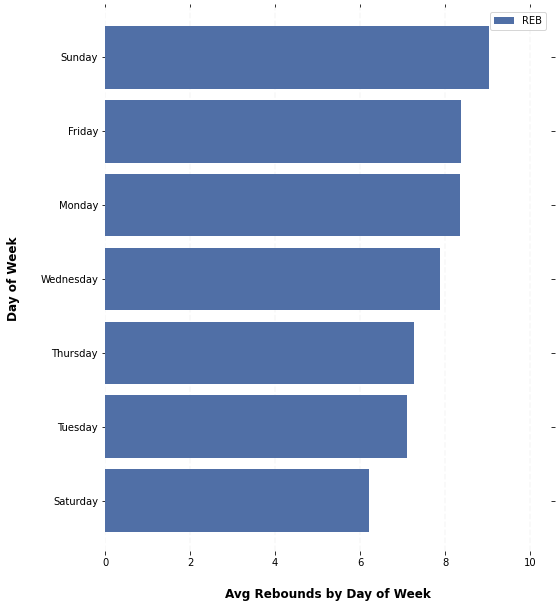

In [12]:
### Avg Rebounds by Weekday

rebsbyweekday = pd.DataFrame(eda.groupby(eda['GAME_DATE'].dt.day_name()).REB.mean().sort_values().reset_index())


ax = rebsbyweekday.plot(kind='barh', x='GAME_DATE', y='REB', figsize=(8, 10), color='#506fa6', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Avg Rebounds by Day of Week", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Day of Week", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

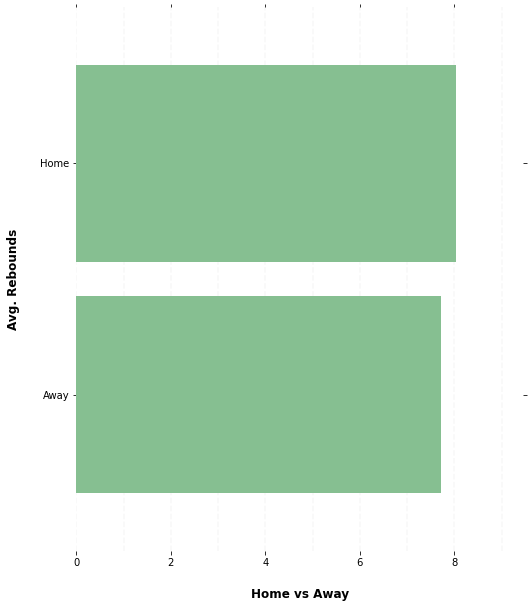

In [13]:
### Avg Rebounds Home vs. Away

rebsbyhomevsaway = eda.groupby(['Home/Away'])['REB'].mean().sort_values()



ax = rebsbyhomevsaway.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Home vs Away", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Avg. Rebounds", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))



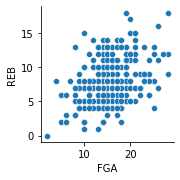

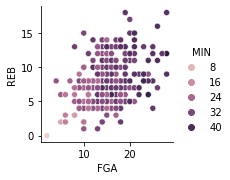

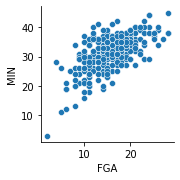

In [14]:
### Correlation between FGA and REBS

FGAvsREBS = sns.pairplot(eda, x_vars='FGA', y_vars='REB')


### Correlation between REBS and FGA (min HUE)

FGAvsREBShueMIN = sns.pairplot(eda, x_vars='FGA', y_vars='REB', hue='MIN')

### Correlation between Min and REBS

FGAvsREBShueMIN = sns.pairplot(eda, x_vars='FGA', y_vars='MIN')

### Cleaning and Transforming Data (Deep Learning)


In [15]:
playercleaned = df_playerallgames[['SEASON_ID', 'Player_ID', 'Game_ID', 'WL', 'REB', 'Opponent', 'Home/Away', 'GAME_DATE']]

playercleaned = pd.get_dummies(playercleaned, columns=['Opponent'])
playercleaned = pd.get_dummies(playercleaned, columns=['Home/Away'])
playercleaned = pd.get_dummies(playercleaned, columns=['WL'])
playercleaned['Rebs>=8'] = np.where(playercleaned['REB']>=8, '1', '0')

display(playercleaned)

,SEASON_ID,Player_ID,Game_ID,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,...,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS,Home/Away_Away,Home/Away_Home,WL_L,WL_W,Rebs>=8
0,22020,204001,0022000866,11,2021-04-18,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,22020,204001,0022000854,12,2021-04-16,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,22020,204001,0022000837,6,2021-04-14,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,22020,204001,0022000810,15,2021-04-11,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
4,22020,204001,0022000786,17,2021-04-08,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,22015,204001,0021500063,4,2015-11-04,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
276,22015,204001,0021500048,14,2015-11-02,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
277,22015,204001,0021500034,6,2015-10-31,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
278,22015,204001,0021500019,8,2015-10-29,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [16]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping



predictors = playercleaned.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_L', 'WL_W'], axis=1)
target = to_categorical(playercleaned['Rebs>=8'])
display(target)
n_cols = predictors.shape[1]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [17]:
model = Sequential()

model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(predictors, target, validation_split=0.25, epochs=20, callbacks=[early_stopping_monitor])

Epoch 1/20
7/7 [==============================] - 2s 241ms/step - loss: 0.6890 - accuracy: 0.5522 - val_loss: 0.7134 - val_accuracy: 0.4286
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6751 - accuracy: 0.5507 - val_loss: 0.7132 - val_accuracy: 0.4429
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6633 - accuracy: 0.5986 - val_loss: 0.7150 - val_accuracy: 0.4714
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.6605 - accuracy: 0.6045 - val_loss: 0.7103 - val_accuracy: 0.4714
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.6378 - accuracy: 0.6719 - val_loss: 0.7124 - val_accuracy: 0.4571
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6344 - accuracy: 0.6580 - val_loss: 0.7093 - val_accuracy: 0.4857
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.6007 - accuracy: 0.7349 - val_loss: 0.7165 - val_accuracy: 0.5000
Epoch 8/20
7/7 [=============

In [18]:
### test on random dataset 

predictorsnew = playercleaned.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_L', 'WL_W'], axis=1)

predictorsnew = predictorsnew.sample(50)

In [19]:
### Notes
### If data is imbalanced, easy to obtain high accuracy
### F1 Score 
### running average of rebounds
### Test some classical methods (Knearest Neighbors)
## Height
## Positions




### Jeremy howard course
### Greddle/ Kotlin

In [20]:
from keras.models import load_model
model.save('rebounds.h5')

my_model = load_model('rebounds.h5')

predictions = my_model.predict(predictorsnew)
np.set_printoptions(suppress=True)
display(predictions)

probability_true = predictions[:,1]

display(probability_true)

display()

array([[0.38450408, 0.615496  ],
       [0.4745685 , 0.52543145],
       [0.2977085 , 0.7022914 ],
       [0.3143566 , 0.68564343],
       [0.32932723, 0.67067283],
       [0.3359933 , 0.6640067 ],
       [0.3754982 , 0.6245018 ],
       [0.6414207 , 0.3585793 ],
       [0.65216625, 0.34783378],
       [0.538957  , 0.461043  ],
       [0.6604779 , 0.3395221 ],
       [0.38100484, 0.6189952 ],
       [0.6820453 , 0.31795472],
       [0.38100484, 0.6189952 ],
       [0.3627905 , 0.6372095 ],
       [0.13572203, 0.864278  ],
       [0.26033705, 0.73966295],
       [0.36630967, 0.6336903 ],
       [0.59720635, 0.40279362],
       [0.41609713, 0.5839029 ],
       [0.46235213, 0.5376478 ],
       [0.32932723, 0.67067283],
       [0.575114  , 0.424886  ],
       [0.36241457, 0.6375854 ],
       [0.65216625, 0.34783378],
       [0.25866085, 0.7413392 ],
       [0.49448884, 0.5055112 ],
       [0.46235213, 0.5376478 ],
       [0.538957  , 0.461043  ],
       [0.42921165, 0.5707883 ],
       [0.

array([0.615496  , 0.52543145, 0.7022914 , 0.68564343, 0.67067283,
       0.6640067 , 0.6245018 , 0.3585793 , 0.34783378, 0.461043  ,
       0.3395221 , 0.6189952 , 0.31795472, 0.6189952 , 0.6372095 ,
       0.864278  , 0.73966295, 0.6336903 , 0.40279362, 0.5839029 ,
       0.5376478 , 0.67067283, 0.424886  , 0.6375854 , 0.34783378,
       0.7413392 , 0.5055112 , 0.5376478 , 0.461043  , 0.5707883 ,
       0.6580781 , 0.7337516 , 0.5707883 , 0.54035866, 0.5376478 ,
       0.41725037, 0.52370536, 0.25811937, 0.6036782 , 0.6372095 ,
       0.5839029 , 0.35558563, 0.7139104 , 0.7761257 , 0.26078957,
       0.25811937, 0.54035866, 0.25811937, 0.73966295, 0.35558563],
      dtype=float32)

In [21]:
### Formatting input for day-to-day games

predictortemplate = playercleaned.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_W', 'WL_L'], axis=1).head(1)
pd.set_option('display.max_columns', None)
predictortemplate['Opponent_DET'] = 0
predictortemplate['Opponent_WAS'] = 0
predictortemplate['Opponent_DAL'] = 1
predictortemplate['Home/Away_Away'] = 0
predictortemplate['Home/Away_Home'] = 1
print(predictortemplate.shape)

(1, 32)


In [22]:
predictions = my_model.predict(predictortemplate)
np.set_printoptions(suppress=True)
display(predictions)

probability_true = predictions[:,1]

display(probability_true)

display()

array([[0.3412554 , 0.65874463]], dtype=float32)

array([0.65874463], dtype=float32)

#### Testing on 2021 Data


In [23]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog

gamelog = playergamelog.PlayerGameLog(player_id=playerid, season = '2020')

#Converts gamelog object into a pandas dataframe

df_games_2020 = gamelog.get_data_frames()[0]

display(df_games_2020)

## Adding Opponent Column
df_games_2020['Opponent'] = df_games_2020['MATCHUP'].str[-3:]

## Adding Home / Away Column
df_games_2020["Home/Away"] = df_games_2020["MATCHUP"].map(lambda x: "Home" if "vs." in x else "Away" if "@" in x else "")

display(df_games_2020)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,204001,0022000866,"APR 18, 2021",DAL vs. SAC,L,37,3,14,0.214,1,7,0.143,2,2,1.000,2,9,11,3,0,0,0,1,9,-24,1
1,22020,204001,0022000854,"APR 16, 2021",DAL vs. NYK,L,38,8,20,0.400,2,8,0.250,5,5,1.000,3,9,12,1,1,2,3,1,23,-4,1
2,22020,204001,0022000837,"APR 14, 2021",DAL @ MEM,W,32,7,13,0.538,2,5,0.400,5,5,1.000,1,5,6,1,0,0,1,4,21,4,1
3,22020,204001,0022000810,"APR 11, 2021",DAL vs. SAS,L,36,12,21,0.571,3,8,0.375,4,4,1.000,3,12,15,3,0,2,3,6,31,-4,1
4,22020,204001,0022000786,"APR 08, 2021",DAL vs. MIL,W,33,10,20,0.500,4,7,0.571,2,2,1.000,6,11,17,1,0,2,1,2,26,17,1
5,22020,204001,0022000456,"APR 07, 2021",DAL @ HOU,L,36,10,19,0.526,2,4,0.500,1,1,1.000,3,9,12,1,0,1,1,0,23,-19,1
6,22020,204001,0022000739,"APR 02, 2021",DAL @ NYK,W,34,6,17,0.353,1,7,0.143,1,2,0.500,0,8,8,1,0,1,3,1,14,16,1
7,22020,204001,0022000723,"MAR 31, 2021",DAL @ BOS,W,32,6,15,0.400,3,7,0.429,4,6,0.667,1,7,8,2,2,3,2,2,19,15,1
8,22020,204001,0022000713,"MAR 29, 2021",DAL @ OKC,W,27,9,15,0.600,2,6,0.333,0,0,0.000,0,9,9,5,1,2,0,2,20,26,1
9,22020,204001,0022000690,"MAR 26, 2021",DAL vs. IND,L,38,12,28,0.429,3,9,0.333,4,6,0.667,7,11,18,3,0,1,2,4,31,-6,1


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Home/Away
0,22020,204001,0022000866,"APR 18, 2021",DAL vs. SAC,L,37,3,14,0.214,1,7,0.143,2,2,1.000,2,9,11,3,0,0,0,1,9,-24,1,SAC,Home
1,22020,204001,0022000854,"APR 16, 2021",DAL vs. NYK,L,38,8,20,0.400,2,8,0.250,5,5,1.000,3,9,12,1,1,2,3,1,23,-4,1,NYK,Home
2,22020,204001,0022000837,"APR 14, 2021",DAL @ MEM,W,32,7,13,0.538,2,5,0.400,5,5,1.000,1,5,6,1,0,0,1,4,21,4,1,MEM,Away
3,22020,204001,0022000810,"APR 11, 2021",DAL vs. SAS,L,36,12,21,0.571,3,8,0.375,4,4,1.000,3,12,15,3,0,2,3,6,31,-4,1,SAS,Home
4,22020,204001,0022000786,"APR 08, 2021",DAL vs. MIL,W,33,10,20,0.500,4,7,0.571,2,2,1.000,6,11,17,1,0,2,1,2,26,17,1,MIL,Home
5,22020,204001,0022000456,"APR 07, 2021",DAL @ HOU,L,36,10,19,0.526,2,4,0.500,1,1,1.000,3,9,12,1,0,1,1,0,23,-19,1,HOU,Away
6,22020,204001,0022000739,"APR 02, 2021",DAL @ NYK,W,34,6,17,0.353,1,7,0.143,1,2,0.500,0,8,8,1,0,1,3,1,14,16,1,NYK,Away
7,22020,204001,0022000723,"MAR 31, 2021",DAL @ BOS,W,32,6,15,0.400,3,7,0.429,4,6,0.667,1,7,8,2,2,3,2,2,19,15,1,BOS,Away
8,22020,204001,0022000713,"MAR 29, 2021",DAL @ OKC,W,27,9,15,0.600,2,6,0.333,0,0,0.000,0,9,9,5,1,2,0,2,20,26,1,OKC,Away
9,22020,204001,0022000690,"MAR 26, 2021",DAL vs. IND,L,38,12,28,0.429,3,9,0.333,4,6,0.667,7,11,18,3,0,1,2,4,31,-6,1,IND,Home


In [24]:
playercleaned2021 = df_games_2020[['SEASON_ID', 'Player_ID', 'Game_ID', 'WL', 'REB', 'Opponent', 'Home/Away', 'GAME_DATE']]

playercleaned2021 = pd.get_dummies(playercleaned2021, columns=['Opponent'])
playercleaned2021 = pd.get_dummies(playercleaned2021, columns=['Home/Away'])
playercleaned2021 = pd.get_dummies(playercleaned2021, columns=['WL'])
playercleaned2021['Rebs>=8'] = np.where(playercleaned2021['REB']>=8, '1', '0')

display(playercleaned2021)

,SEASON_ID,Player_ID,Game_ID,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_DEN,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_MEM,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Home/Away_Away,Home/Away_Home,WL_L,WL_W,Rebs>=8
0,22020,204001,0022000866,11,"APR 18, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
1,22020,204001,0022000854,12,"APR 16, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2,22020,204001,0022000837,6,"APR 14, 2021",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,22020,204001,0022000810,15,"APR 11, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
4,22020,204001,0022000786,17,"APR 08, 2021",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
5,22020,204001,0022000456,12,"APR 07, 2021",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
6,22020,204001,0022000739,8,"APR 02, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
7,22020,204001,0022000723,8,"MAR 31, 2021",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
8,22020,204001,0022000713,9,"MAR 29, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
9,22020,204001,0022000690,18,"MAR 26, 2021",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [25]:

from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping



predictors2021 = playercleaned2021.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_L', 'WL_W'], axis=1)
target2021 = to_categorical(playercleaned2021['Rebs>=8'])
display(target2021)
n_cols2021 = predictors2021.shape[1]

predictors2021.shape

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

(37, 25)

In [26]:
model2021 = Sequential()

model2021.add(Dense(100, activation='relu', input_shape = (n_cols2021,)))
model2021.add(Dense(100, activation='relu'))
model2021.add(Dense(100, activation='relu'))
model2021.add(Dense(2, activation='softmax'))
model2021.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
model2021.fit(predictors2021, target2021, validation_split=0.25, epochs=20, callbacks=[early_stopping_monitor])



Epoch 1/20
1/1 [==============================] - 1s 904ms/step - loss: 0.7206 - accuracy: 0.4074 - val_loss: 0.6704 - val_accuracy: 0.7000
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 0.6854 - accuracy: 0.5926 - val_loss: 0.6530 - val_accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 0s 34ms/step - loss: 0.6549 - accuracy: 0.7037 - val_loss: 0.6398 - val_accuracy: 0.8000
Epoch 4/20
1/1 [==============================] - 0s 52ms/step - loss: 0.6287 - accuracy: 0.7037 - val_loss: 0.6289 - val_accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 49ms/step - loss: 0.6062 - accuracy: 0.7407 - val_loss: 0.6188 - val_accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 31ms/step - loss: 0.5862 - accuracy: 0.7407 - val_loss: 0.6108 - val_accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 50ms/step - loss: 0.5685 - accuracy: 0.7407 - val_loss: 0.6053 - val_accuracy: 0.7000
Epoch 8/20
1/1 [==========

In [27]:
### Formatting input for day-to-day games

from keras.models import load_model
model.save('rebounds2021.h5')

my_model2021 = load_model('rebounds2021.h5')




In [28]:

predictortemplate2021 = predictors2021.head(1)
pd.set_option('display.max_columns', None)
predictortemplate2021['Opponent_DET'] = 0
predictortemplate2021['Opponent_WAS'] = 0
predictortemplate2021['Opponent_DAL'] = 1
predictortemplate2021['Home/Away_Away'] = 0
predictortemplate2021['Home/Away_Home'] = 1
display(predictortemplate2021.shape)

<ipython-input-28-08049ebdc373>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictortemplate2021['Opponent_DET'] = 0
<ipython-input-28-08049ebdc373>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictortemplate2021['Opponent_WAS'] = 0
<ipython-input-28-08049ebdc373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

(1, 28)

### Cleaning and Transforming Data (K-Nearest Neighbors)

In [29]:
knncleaning = df_playerallgames[['SEASON_ID', 'Player_ID', 'Game_ID', 'WL', 'REB', 'Opponent', 'Home/Away', 'GAME_DATE']]


In [30]:
knncleaning["WL"] = knncleaning["WL"].map(lambda x: "1" if "W" in x else "0" if "L" in x else "")
knncleaning = pd.get_dummies(knncleaning, columns=['Opponent'])
knncleaning = pd.get_dummies(knncleaning, columns=['Home/Away'])


<ipython-input-30-d0bc426dde7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knncleaning["WL"] = knncleaning["WL"].map(lambda x: "1" if "W" in x else "0" if "L" in x else "")


In [31]:
knncleaning['Rebs>=8'] = np.where(knncleaning['REB']>=8, '1', '0')

In [32]:
display(knncleaning)

,SEASON_ID,Player_ID,Game_ID,WL,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_CLE,Opponent_DAL,Opponent_DEN,Opponent_DET,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_LAL,Opponent_MEM,Opponent_MIA,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHI,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS,Home/Away_Away,Home/Away_Home,Rebs>=8
0,22020,204001,0022000866,0,11,2021-04-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,22020,204001,0022000854,0,12,2021-04-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,22020,204001,0022000837,1,6,2021-04-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,22020,204001,0022000810,0,15,2021-04-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,22020,204001,0022000786,1,17,2021-04-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,22015,204001,0021500063,0,4,2015-11-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
276,22015,204001,0021500048,0,14,2015-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
277,22015,204001,0021500034,1,6,2015-10-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
278,22015,204001,0021500019,0,8,2015-10-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [85]:
y = knncleaning['Rebs>=8']
X = knncleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
               axis = 1) 

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[-0.0848759 ,  0.        , -0.08472054, ..., -0.1617962 ,
        -0.95021714,  0.95021714],
       [ 1.02416923,  0.        ,  1.02204305, ..., -0.1617962 ,
        -0.95021714,  0.95021714],
       [-1.19392104,  0.        , -1.19502805, ..., -0.1617962 ,
         1.05239103, -1.05239103],
       ...,
       [-0.63939847,  0.        , -0.63609189, ..., -0.1617962 ,
         1.05239103, -1.05239103],
       [ 1.02416923,  0.        ,  1.02586428, ..., -0.1617962 ,
        -0.95021714,  0.95021714],
       [-0.0848759 ,  0.        , -0.08349486, ..., -0.1617962 ,
         1.05239103, -1.05239103]])

In [88]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [89]:
print(test_scores, train_scores)

len(test_scores)
len(train_scores)

[0.5714285714285714, 0.5357142857142857, 0.5476190476190477, 0.5357142857142857, 0.5595238095238095, 0.5714285714285714, 0.5952380952380952, 0.6309523809523809, 0.6071428571428571, 0.5952380952380952, 0.5833333333333334, 0.5833333333333334, 0.6190476190476191, 0.6190476190476191, 0.5952380952380952, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5952380952380952, 0.5952380952380952, 0.5714285714285714, 0.6071428571428571, 0.6190476190476191, 0.5833333333333334, 0.6071428571428571, 0.6071428571428571, 0.5833333333333334, 0.5952380952380952, 0.5952380952380952] [1.0, 0.7908163265306123, 0.7857142857142857, 0.7142857142857143, 0.7397959183673469, 0.7193877551020408, 0.7193877551020408, 0.6989795918367347, 0.6989795918367347, 0.6989795918367347, 0.6836734693877551, 0.6479591836734694, 0.6632653061224489, 0.6785714285714286, 0.6938775510204082, 0.6989795918367347, 0.6683673469387755, 0.6683673469387755, 0.6581632653061225, 0.6581632653061225, 0.6530612244897959, 0.65306122448

29

In [90]:
print(max(test_scores)) 
### Optimal Nearest neighbours is 8

0.6309523809523809


C:\Users\Mario Hage\DS Springboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mario Hage\DS Springboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


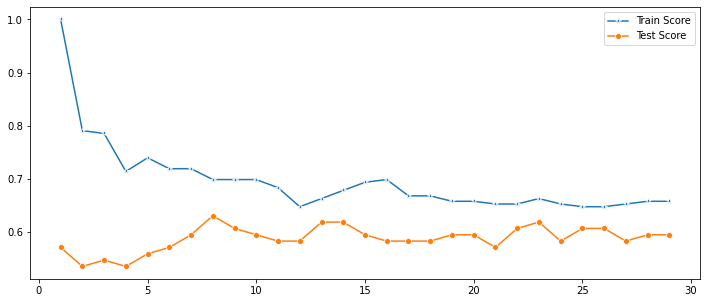

In [91]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

In [97]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)
    
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.6989795918367347
0.6309523809523809


In [98]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
print(pl)

[[28 13]
 [18 25]]


In [99]:

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        41
           1       0.66      0.58      0.62        43

    accuracy                           0.63        84
   macro avg       0.63      0.63      0.63        84
weighted avg       0.63      0.63      0.63        84



In [100]:
### Trying Grid Search

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [101]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.47857142857142854
Best Parameters: {'n_neighbors': 39}


### Random Forest Implementation 

In [102]:
rfcleaning = knncleaning

In [103]:
display(rfcleaning)

,SEASON_ID,Player_ID,Game_ID,WL,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_CLE,Opponent_DAL,Opponent_DEN,Opponent_DET,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_LAL,Opponent_MEM,Opponent_MIA,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHI,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS,Home/Away_Away,Home/Away_Home,Rebs>=8
0,22020,204001,0022000866,0,11,2021-04-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,22020,204001,0022000854,0,12,2021-04-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,22020,204001,0022000837,1,6,2021-04-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,22020,204001,0022000810,0,15,2021-04-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,22020,204001,0022000786,1,17,2021-04-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,22015,204001,0021500063,0,4,2015-11-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
276,22015,204001,0021500048,0,14,2015-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
277,22015,204001,0021500034,1,6,2015-10-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
278,22015,204001,0021500019,0,8,2015-10-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [104]:
y1 = rfcleaning['Rebs>=8']
X1 = rfcleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
               axis = 1) 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.3, random_state=1)

In [106]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [107]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.571
Random Forest: f1-score=0.571


30


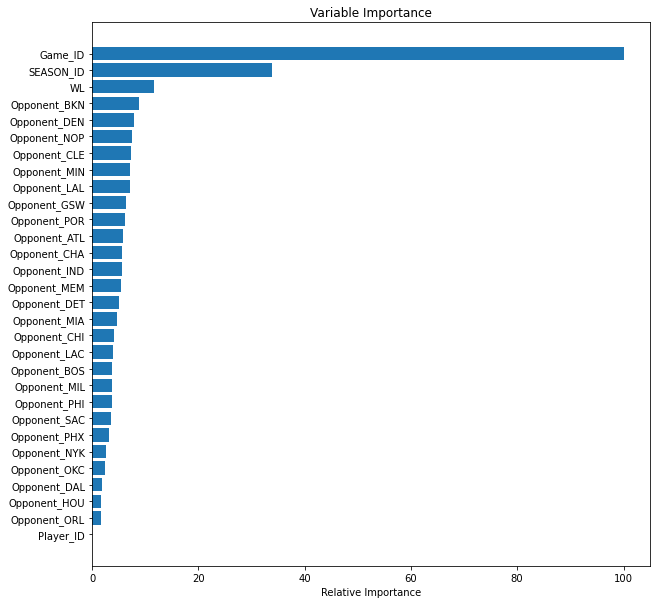

In [109]:
### Plotting Feature Importance

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Logistic Regression Implementation

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y1 = rfcleaning['Rebs>=8']
X1 = rfcleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
               axis = 1) 
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(rfcleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
axis = 1),rfcleaning['Rebs>=8'],random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.4857142857142857
